# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import random
from scipy.stats import linregress
from pprint import pprint
import os
import csv

# Import API key
from config import api_key_weather
from config import api_key_google_maps

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key_weather

# Generate Cities List


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

602

# Perform API Calls

In [ ]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name)


In [3]:
# create empty lists to store the data
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_counter = 0
set_counter = 0

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

# use for loop to add city to base url
for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(query_url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=hobart
Processing record 2 of set 0 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=tuktoyaktuk
Processing record 3 of set 0 | halifax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=halifax
Processing record 4 of set 0 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=guerrero negro
Processing record 5 of set 0 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vaitupu
City not found!
Processing record 6 of set 0 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q

Processing record 2 of set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=butaritari
Processing record 3 of set 1 | beaverlodge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=beaverlodge
Processing record 4 of set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=hithadhoo
Processing record 5 of set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=bambous virieux
Processing record 6 of set 1 | birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=birjand
Processing record 7 of set 1 | balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=balabac
Processing record 8 of set 1 | kholodnyy
http://api.openweathermap

Processing record 6 of set 2 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=talnakh
Processing record 7 of set 2 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=nhulunbuy
Processing record 8 of set 2 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=prince rupert
Processing record 9 of set 2 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=severo-kurilsk
Processing record 10 of set 2 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=sabang
Processing record 11 of set 2 | bireun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=bireun
Processing record 12 of set 2 | vestmanna
http://api.openweathermap.org/

Processing record 9 of set 3 | rio tercero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=rio tercero
Processing record 10 of set 3 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vestmannaeyjar
Processing record 11 of set 3 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=bonavista
Processing record 12 of set 3 | la palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=la palma
Processing record 13 of set 3 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=port blair
Processing record 14 of set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=cabo san lucas
Processing record 15 of set 3 | port-cartier
ht

Processing record 12 of set 4 | lewiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=lewiston
Processing record 13 of set 4 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=clyde river
Processing record 14 of set 4 | zhitikara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=zhitikara
City not found!
Processing record 15 of set 4 | kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=kapit
Processing record 16 of set 4 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vostok
Processing record 17 of set 4 | gulshat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=gulshat
City not found!
Processing record 18 of set 4 | awbari
http://api.open

Processing record 15 of set 5 | yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=yatou
Processing record 16 of set 5 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=ribeira grande
Processing record 17 of set 5 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=souillac
Processing record 18 of set 5 | jining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=jining
Processing record 19 of set 5 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=kieta
Processing record 20 of set 5 | grants pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=grants pass
Processing record 21 of set 5 | lompoc
http://api.openweathermap.org/data/2.5/we

Processing record 19 of set 6 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=klaksvik
Processing record 20 of set 6 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=kamenskoye
City not found!
Processing record 21 of set 6 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=nanortalik
Processing record 22 of set 6 | cascais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=cascais
Processing record 23 of set 6 | vung tau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vung tau
Processing record 24 of set 6 | sciacca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=sciacca
Processing record 25 of set 6 | terra santa
http://api.openwea

Processing record 22 of set 7 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=ahipara
Processing record 23 of set 7 | porto velho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=porto velho
Processing record 24 of set 7 | innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=innisfail
Processing record 25 of set 7 | sokoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=sokoni
Processing record 26 of set 7 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=goderich
Processing record 27 of set 7 | jingdezhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=jingdezhen
Processing record 28 of set 7 | juli
http://api.openweathermap.org/data/2.5/

Processing record 24 of set 8 | lichinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=lichinga
Processing record 25 of set 8 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=ponta delgada
Processing record 26 of set 8 | harbour breton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=harbour breton
Processing record 27 of set 8 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=kaeo
Processing record 28 of set 8 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=san vicente
Processing record 29 of set 8 | boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=boyolangu
Processing record 30 of set 8 | mana
http://api.openweatherm

Processing record 27 of set 9 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=tecoanapa
Processing record 28 of set 9 | mandera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=mandera
Processing record 29 of set 9 | jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=jumla
Processing record 30 of set 9 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=aksarka
Processing record 31 of set 9 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=bambanglipuro
Processing record 32 of set 9 | san andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=san andres
Processing record 33 of set 9 | calabozo
http://api.openweathermap.org/data/

Processing record 29 of set 10 | high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=high level
Processing record 30 of set 10 | bur gabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=bur gabo
City not found!
Processing record 31 of set 10 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=portland
Processing record 32 of set 10 | valparaiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=valparaiso
Processing record 33 of set 10 | coracao de jesus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=coracao de jesus
Processing record 34 of set 10 | mabay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=mabay
Processing record 35 of set 10 | kamalia
h

Processing record 32 of set 11 | george town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=george town
Processing record 33 of set 11 | ratangarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=ratangarh
Processing record 34 of set 11 | tselinnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=tselinnoye
Processing record 35 of set 11 | fort saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=fort saint john
City not found!
Processing record 36 of set 11 | swan hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=swan hill
Processing record 37 of set 11 | strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=strezhevoy
Processing record 38 of set 

# Convert to DataFrame

In [5]:
weather_dictionary = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dictionary)
weather_data.count()


City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Temp          551
Lat           551
Lng           551
Wind Speed    551
dtype: int64

In [6]:
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,hobart,100,AU,1579664190,31,84.99,-42.88,147.33,17.22
1,tuktoyaktuk,5,CA,1579664025,74,-27.40,69.45,-133.04,5.82
2,halifax,20,CA,1579663905,78,8.60,44.65,-63.57,2.24
3,guerrero negro,100,MX,1579664193,80,61.97,27.98,-114.06,7.85
4,vaini,20,TO,1579664023,78,82.40,-21.20,-175.20,13.87


# Plotting the Data

In [13]:
#output to a csv
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join("data_cities")
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)



In [14]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')


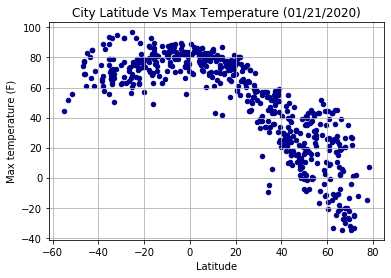

In [16]:
#Latitude vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("LatitudeVsTemperature.png")



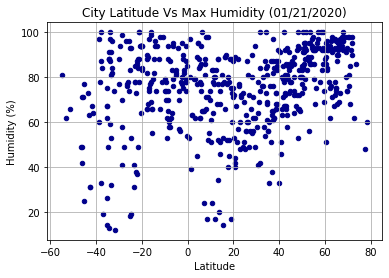

In [17]:
#Latitude vs Humidity Plot

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("LatitudeVsHumidity.png")



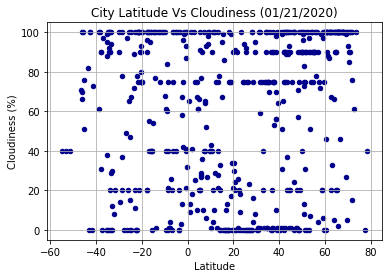

In [18]:
#Latitude vs Cloudiness Plot

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")


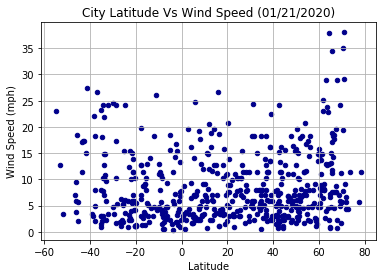

In [19]:
#Latitude vs. Wind Speed Plot
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("LatitudeVsWindSpeed.png")




# Linear Regression

In [21]:
nothern = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)


In [25]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("Temperature vs Latitude.png")
    plt.show()


The r-squared is: -0.8586972386094425


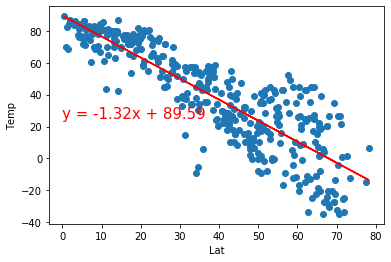

In [26]:
#Northern Hemisphere - Temperature (F) vs. Latitude
xlbl = "Lat"
ylbl = "Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)



The r-squared is: 0.3589053070832394


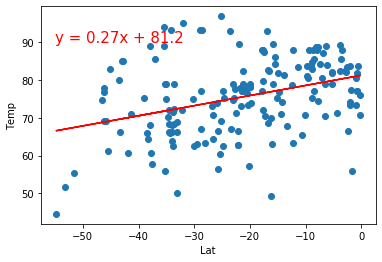

In [27]:
#Southern Hemisphere - Temperature (F) vs. Latitude
xlbl = "Lat"
ylbl = "Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)


The r-squared is: 0.42371544010612244


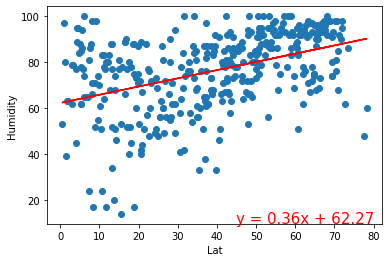

In [28]:
#Northern Hemisphere - Humidity (%) vs. Latitude
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)


The r-squared is: 0.2788641638255888


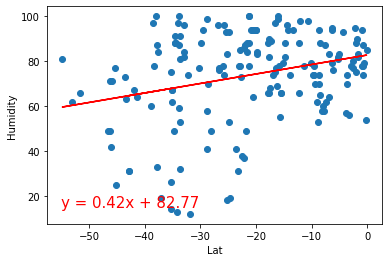

In [29]:
#Southern Hemisphere - Humidity (%) vs. Latitude
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)


The r-squared is: 0.3225949988520249


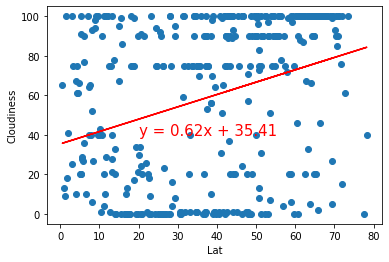

In [30]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)


The r-squared is: -0.02802001270141883


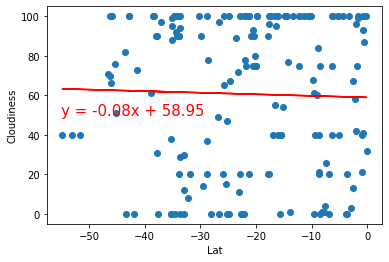

In [31]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)


The r-squared is: 0.19898226649165593


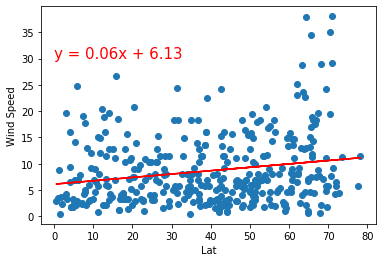

In [32]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)


The r-squared is: -0.26505588409395764


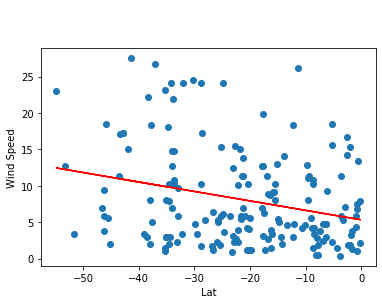

In [33]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)


# Observations
